# Evaluating Various ML Models at single file


In [1]:
from pandas import read_csv

In [5]:
fileName = "kidny_stone.csv"
names = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc','class']
dataset = read_csv(fileName, names=names)

# Summarize Dataset

In [6]:
print(dataset.shape)
print(dataset.head(20))
print(dataset.describe())
print(dataset.groupby('class').size())

(79, 7)
    gravity    ph  osmo  cond  urea  calc  class
0     1.021  4.91   725  14.0   443  2.45      0
1     1.017  5.74   577  20.0   296  4.49      0
2     1.008  7.20   321  14.9   101  2.36      0
3     1.011  5.51   408  12.6   224  2.15      0
4     1.005  6.52   187   7.5    91  1.16      0
5     1.020  5.27   668  25.3   252  3.34      0
6     1.012  5.62   461  17.4   195  1.40      0
7     1.029  5.67  1107  35.9   550  8.48      0
8     1.015  5.41   543  21.9   170  1.16      0
9     1.021  6.13   779  25.7   382  2.21      0
10    1.011  6.19   345  11.5   152  1.93      0
11    1.025  5.53   907  28.4   448  1.27      0
12    1.006  7.12   242  11.3    64  1.03      0
13    1.007  5.35   283   9.9   147  1.47      0
14    1.011  5.21   450  17.9   161  1.53      0
15    1.018  4.90   684  26.1   284  5.09      0
16    1.007  6.63   253   8.4   133  1.05      0
17    1.025  6.81   947  32.6   395  2.03      0
18    1.008  6.88   395  26.1    95  7.68      0
19    1.014 

# Visualize Data

In [7]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

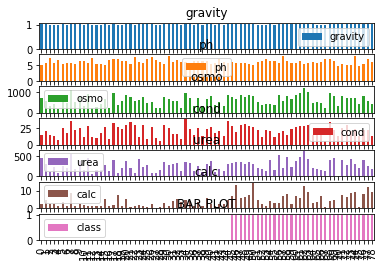

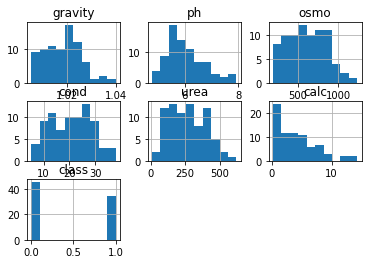

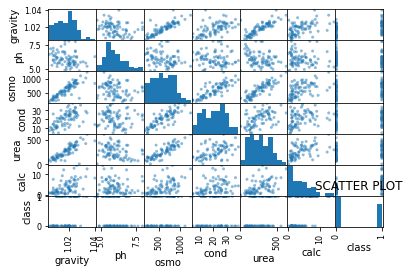

In [10]:
dataset.plot(kind='bar',subplots=True)
pyplot.title('BAR PLOT')
pyplot.show()

dataset.hist()
pyplot.title('HISTOGRAM PLOT')
pyplot.show()

scatter_matrix(dataset)
pyplot.title('SCATTER PLOT')
pyplot.show()

# Evaluating various ML Algorithm

In [11]:
# 6 ML Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [12]:
array = dataset.values
X = array[:,0:6]
y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [13]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.728571 (0.167413)
LDA: 0.740476 (0.170184)
KNN: 0.571429 (0.223607)
CART: 0.757143 (0.153123)
NB: 0.659524 (0.180089)
SVM: 0.604762 (0.066667)


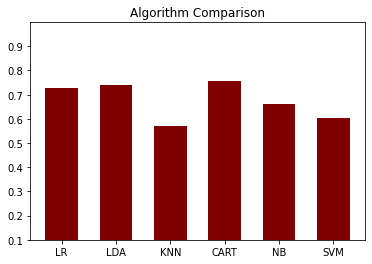

 CART
Best model is CART, with accuracy of 75.71428571428572%.


In [24]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.ylim(.1, .999)
pyplot.bar(names, res, color ='maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()
accuracy = max(res)
index = res.index(accuracy)
Bestmodel = names[index]
print("",Bestmodel )
print("Best model is {}, with accuracy of {}%.".format(Bestmodel,accuracy*100))

